# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read The Data

In [2]:
df=pd.read_csv("/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv")

# Exploring the Data

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.rename(columns={"listed_in":"category"},inplace=True)

In [5]:
#Converting The Data Type From String Into DateTime
df["date"] = pd.to_datetime(df["date_added"])

In [6]:
df.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,category,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,2021-09-25
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24


In [7]:
df["year"] = df["date"].dt.year

In [8]:
df.head(1)

,show_id,type,title,director,country,date_added,release_year,rating,duration,category,date,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,2021-09-25,2021


In [9]:
df.describe(include="all")

,show_id,type,title,director,country,date_added,release_year,rating,duration,category,date,year
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790,8790,8790.000000
unique,8790,2,8787,4528,86,1713,NaN,14,220,513,NaN,NaN
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies",NaN,NaN
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN,2019-05-17 21:44:01.638225408,2018.873606
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,2008-01-01 00:00:00,2008.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,2018-04-06 00:00:00,2018.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,2019-07-03 00:00:00,2019.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,2020-08-19 18:00:00,2020.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000


In [10]:
#  there are not null in any colum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   object        
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   category      8790 non-null   object        
 10  date          8790 non-null   datetime64[ns]
 11  year          8790 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 789.9+ KB


In [11]:
# names of columes
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'category',
 'date',
 'year']

#  Univariate Analysis

* show_id

In [12]:
#there are not duplicates
# Number of rows 8790
len(df["show_id"].unique())

8790

*  Type

In [13]:
Content=df["type"].unique().tolist()

In [14]:
type_counts=df["type"].value_counts()
type_counts

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

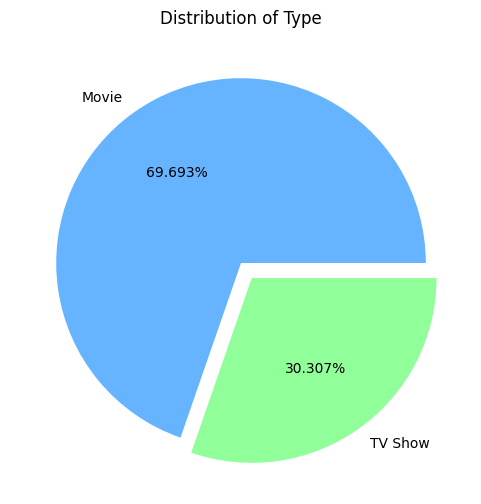

In [15]:
# movie is more watching
plt.figure(figsize=(20,6))
plt.pie(type_counts,labels=Content,autopct='%1.3f%%',explode=[0,0.1], colors=['#66b4ff','#91ff99'])
plt.title('Distribution of Type')
plt.show()

*  **Title**

In [16]:
# there are dublicat of title
len(df["title"].unique())

8787

In [17]:
#This shows all rows that repeated
df[df['title'].duplicated(keep=False)]


,show_id,type,title,director,country,date_added,release_year,rating,duration,category,date,year
393,s3997,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas",2019-03-20,2019
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas",2019-03-20,2019
2925,s3963,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies",2019-03-29,2019
3285,s4523,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers",2018-10-10,2018
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers",2018-10-10,2018
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies",2019-03-29,2019


In [18]:
# drop that rows repeated
df.drop_duplicates(subset=df.columns.difference(['show_id']),inplace=True)

In [19]:
# Numper of rows
df.shape[0]

8787

*  Director

In [20]:
# there is repetition 
len(df["director"].unique())

4528

In [21]:
df['director'].value_counts()

director
Not Given                         2587
Rajiv Chilaka                       20
Raúl Campos, Jan Suter              18
Alastair Fothergill                 18
Marcus Raboy                        16
                                  ... 
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64

In [22]:
#the most director reapated
df['director'].value_counts().idxmax()

'Not Given'

In [23]:
# number 
df['director'].value_counts().max()

2587

*  Country

In [24]:
# the most country make movie and tv
df["country"].value_counts().idxmax()

'United States'

In [25]:
# number
df["country"].value_counts().max()

3240

In [26]:
country=df['country'].value_counts().reset_index().sort_values(by='count',ascending = False).head(10)
country

,country,count
0,United States,3240
1,India,1056
2,United Kingdom,638
3,Pakistan,420
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


Text(0, 0.5, 'No of Movies')

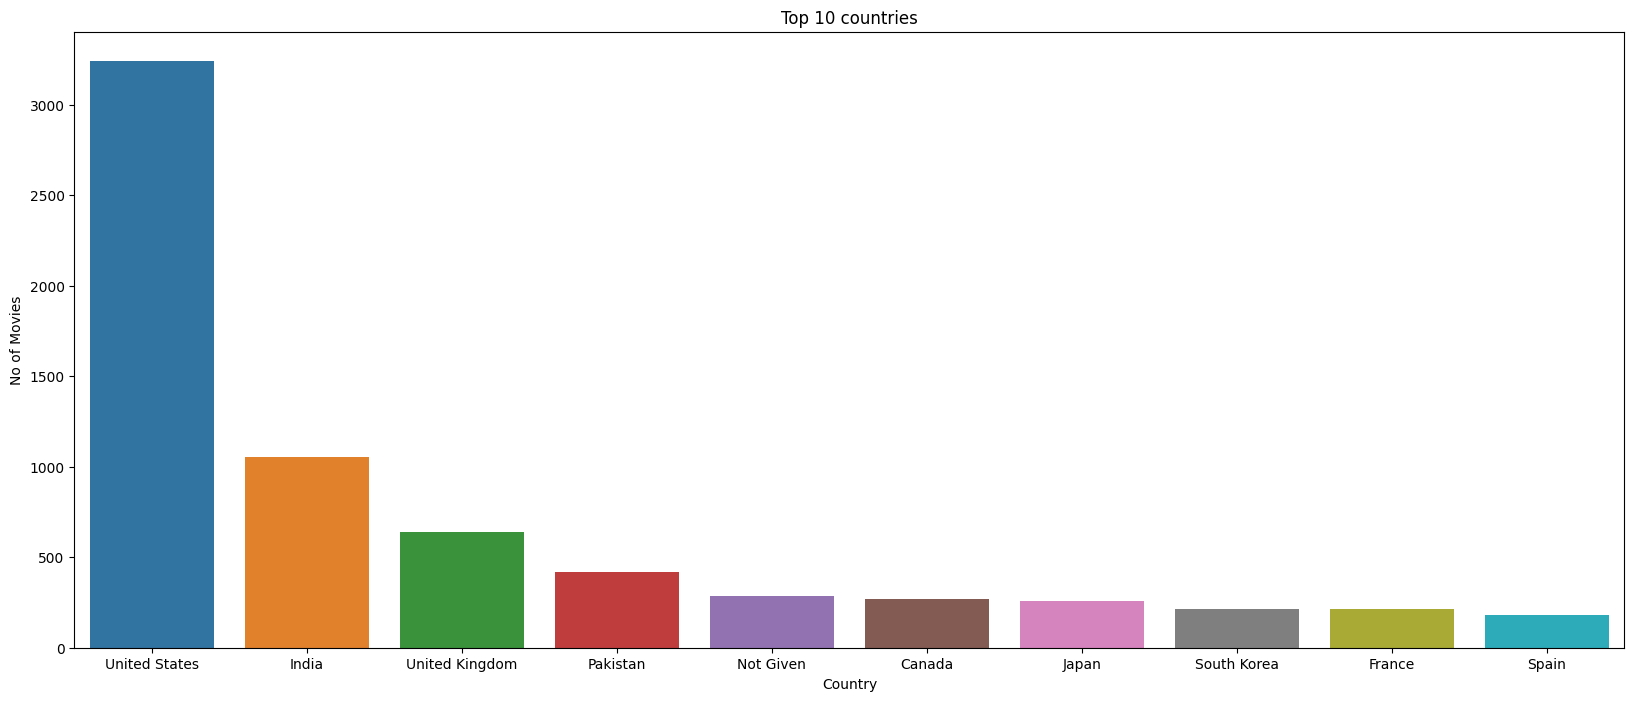

In [27]:
plt.figure(figsize=(20,8))
plt.title('Top 10 countries')
sns.barplot(x='country',y='count',data=country)
plt.xlabel('Country')
plt.ylabel('No of Movies')

*  Date Added

In [28]:
# the most day added "2020-01-01"
df["date"].value_counts().idxmax()

Timestamp('2020-01-01 00:00:00')

*  release_year

In [29]:
df["release_year"].value_counts()

release_year
2018    1144
2017    1030
2019    1029
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: count, Length: 74, dtype: int64

*  rating

In [30]:
# type of rating
df["rating"].unique().tolist()

['PG-13',
 'TV-MA',
 'TV-PG',
 'TV-14',
 'TV-Y7',
 'TV-Y',
 'PG',
 'TV-G',
 'R',
 'G',
 'NC-17',
 'NR',
 'TV-Y7-FV',
 'UR']

<Axes: xlabel='rating'>

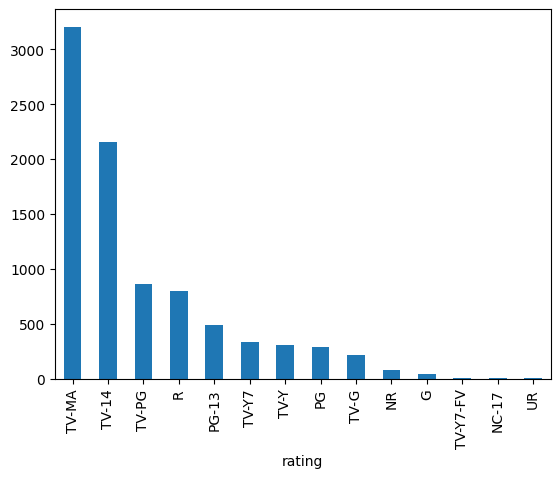

In [31]:
df.rating.value_counts().plot(kind = "bar")

*  duration

In [32]:
df["duration"].value_counts()

duration
1 Season      1790
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: count, Length: 220, dtype: int64

*  category

In [33]:
# number of category
len(df["category"].unique())

513

In [34]:
df["category"].value_counts()

category
Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Anime Features                                                1
Action & Adventure, Horror Movies, Independent Movies         1
Action & Adventure, Classic Movies, International Movies      1
Cult Movies, Independent Movies, Thrillers                    1
Classic & Cult TV, Crime TV Shows, TV Dramas                  1
Name: count, Length: 513, dtype: int64

#  **Multivariate Analysis**

In [35]:
df.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,category,date,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,2021-09-25,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24,2021


In [36]:
the_most_director=pd.crosstab(df['director'], df['type']).idxmax()
print("the_most_director", the_most_director)

the_most_director type
Movie      Not Given
TV Show    Not Given
dtype: object


In [37]:
director_counts=pd.crosstab(df['director'], df['type']).max()
print("director_counts", director_counts)

director_counts type
Movie       173
TV Show    2414
dtype: int64


In [38]:
count_director=df.groupby("director")["type"].value_counts().reset_index()

In [39]:
count_director[count_director.director=="Not Given"]["count"].sum()

2587

In [40]:
count_director[count_director.director!="Not Given"]["count"].sum()

6200

In [41]:
list_Given_NonGiven=[6200,2587]

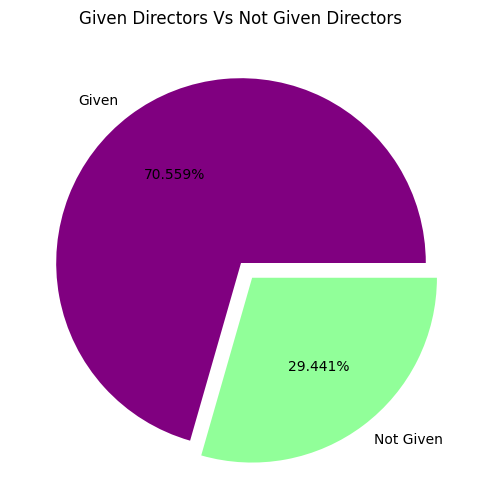

In [42]:
plt.figure(figsize=(20,6))
plt.pie(list_Given_NonGiven,labels=["Given","Not Given"],autopct='%1.3f%%',explode=[0,0.1], colors=['purple','#91ff99'])
plt.title('Given Directors Vs Not Given Directors')
plt.show()

In [43]:
Movie_count_director=count_director[count_director.type=="Movie"].sort_values(by="count",ascending=False).head(10)
Movie_count_director

,director,type,count
3101,Not Given,Movie,173
3432,Rajiv Chilaka,Movie,19
3484,"Raúl Campos, Jan Suter",Movie,18
4092,Suhas Kadav,Movie,16
2623,Marcus Raboy,Movie,15
1803,Jay Karas,Movie,14
690,Cathy Garcia-Molina,Movie,13
4532,Youssef Chahine,Movie,12
1800,Jay Chapman,Movie,12
2699,Martin Scorsese,Movie,12


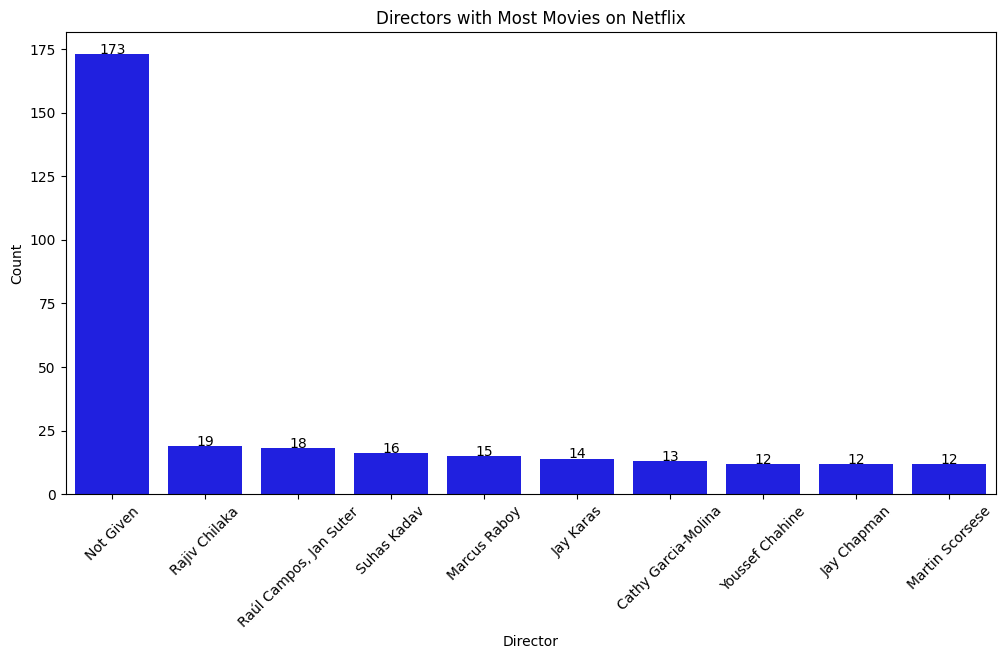

In [44]:
plt.figure(figsize=(12, 6))


sns.barplot(x='director', y='count', data=Movie_count_director, color='blue')


for index, value in enumerate(Movie_count_director['count']):
    plt.text(index, value + 0.1, str(value), ha='center')

plt.title('Directors with Most Movies on Netflix')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

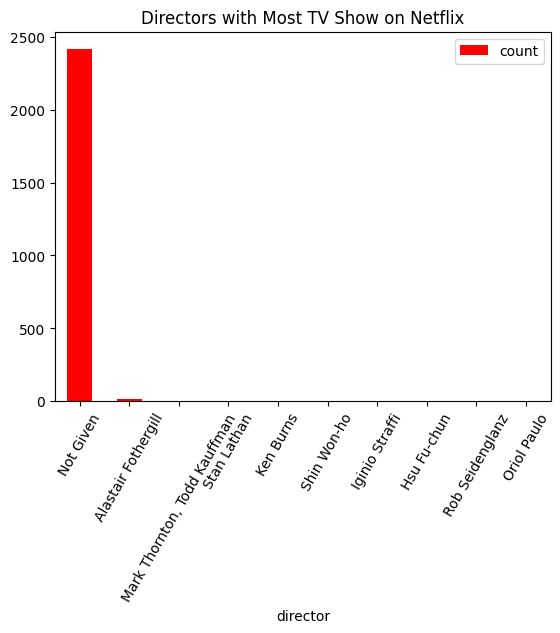

In [45]:
TV_show_count_director=count_director[count_director.type=="TV Show"].sort_values(by="count",ascending=False).head(10)
TV_show_count_director.plot(kind="bar" ,x="director",y="count",title="Directors with Most TV Show on Netflix" ,color="red")
plt.xticks(rotation=60)
plt.show()

In [46]:
total_content_director = count_director.groupby('director')['count'].sum().reset_index()

top_directors = total_content_director.sort_values(by='count', ascending=False).head(11)  
top_directors = top_directors.iloc[1:]  # Skip the first row

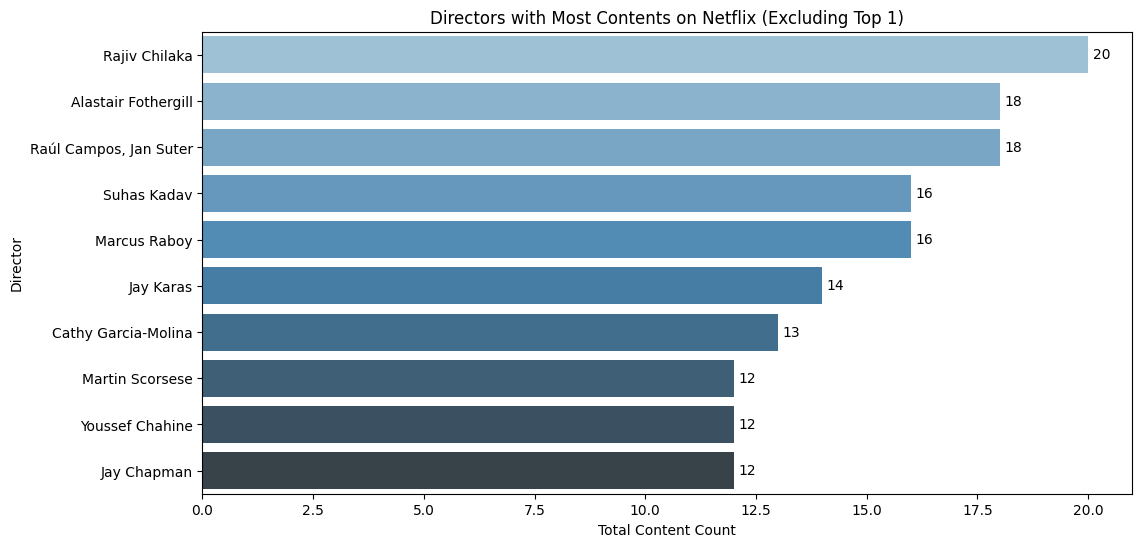

In [47]:
# Plotting 
plt.figure(figsize=(12, 6))
sns.barplot(y='director', x='count', data=top_directors, palette='Blues_d')

# Annotate the bars with the count values
for index, value in enumerate(top_directors['count']):
    plt.text(value + 0.1, index, str(value), va='center')

plt.title('Directors with Most Contents on Netflix (Excluding Top 1)')
plt.xlabel('Total Content Count')
plt.ylabel('Director')
plt.show()

In [48]:
theMostCountry=pd.crosstab(df['country'], df['type']).idxmax()
print("the most country added content ",theMostCountry)

the most country added content  type
Movie      United States
TV Show    United States
dtype: object


In [49]:
the_most_country =pd.crosstab(df['country'], df['type']).max()
print("the most country added content Show by value ",the_most_country)

the most country added content Show by value  type
Movie      2395
TV Show     845
dtype: int64


In [50]:
CountriesByContent=df.groupby("country").type.value_counts().reset_index()


In [51]:
TheCountries_movie=CountriesByContent[CountriesByContent.type=="Movie"].sort_values(by="count",ascending=False).head(10)

In [52]:
TheCountries_TV=CountriesByContent[CountriesByContent.type=="TV Show"].sort_values(by="count",ascending=False).head()


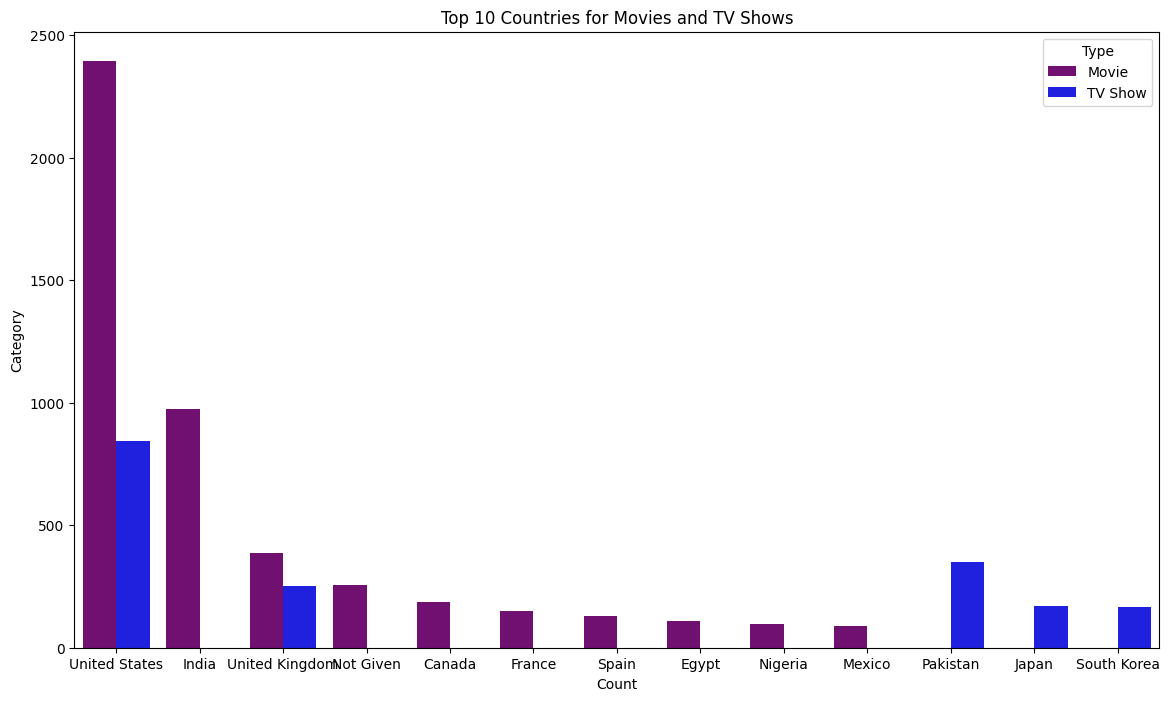

In [53]:
top_combined = pd.concat([TheCountries_movie, TheCountries_TV])
plt.figure(figsize=(14, 8))
sns.barplot(x='country', y='count', hue='type', data=top_combined, palette={'Movie': 'purple', 'TV Show': 'blue'},dodge=True)

plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Top 10 Countries for Movies and TV Shows')
plt.legend(title='Type')
plt.show()

In [54]:
the_most_release_year=pd.crosstab(df.release_year ,df.type).idxmax()
the_most_release_year

type
Movie      2018
TV Show    2020
dtype: int64

In [55]:
rating=pd.crosstab(df.rating,df.type).sort_values(by="Movie",ascending=False).reset_index()
rating


type,rating,Movie,TV Show
0,TV-MA,2062,1143
1,TV-14,1426,729
2,R,796,2
3,TV-PG,540,321
4,PG-13,490,0
5,PG,287,0
6,TV-Y7,139,194
7,TV-Y,131,175
8,TV-G,126,94
9,NR,75,4


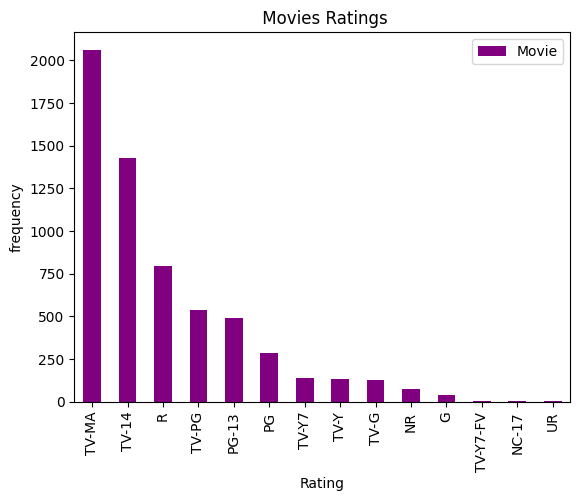

In [56]:
rating=pd.crosstab(df.rating,df.type).sort_values(by="Movie",ascending=False).reset_index()
rating.plot(kind="bar",x='rating' ,y ="Movie",title=" Movies Ratings" ,xlabel='Rating', ylabel="frequency" ,color="purple")
plt.show()

<Axes: title={'center': 'TV Show Ratings'}, xlabel='Rating', ylabel='Frequency'>

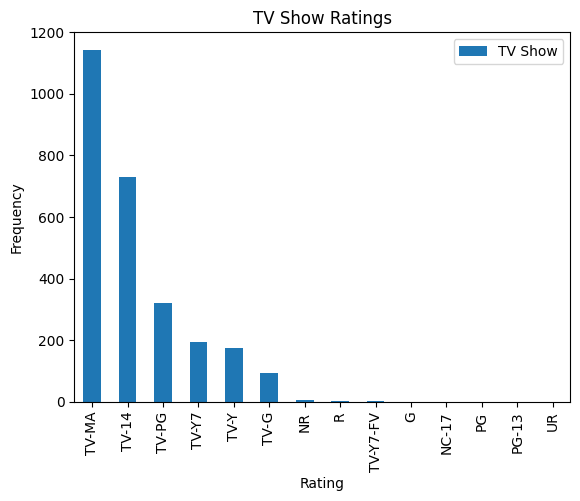

In [57]:
rating=pd.crosstab(df.rating,df.type).sort_values(by="TV Show",ascending=False).reset_index()
rating.plot(kind="bar",x="rating", y="TV Show",title="TV Show Ratings",xlabel="Rating",ylabel="Frequency")

In [58]:
pd.crosstab(df.duration , df.type)

type,Movie,TV Show
duration,,
1 Season,0,1790
10 Seasons,0,6
10 min,1,0
100 min,108,0
101 min,116,0
...,...,...
95 min,137,0
96 min,130,0
97 min,146,0


In [59]:
durations = df.groupby( 'duration')['type'].value_counts().reset_index()
durations

,duration,type,count
0,1 Season,TV Show,1790
1,10 Seasons,TV Show,6
2,10 min,Movie,1
3,100 min,Movie,108
4,101 min,Movie,116
...,...,...,...
215,95 min,Movie,137
216,96 min,Movie,130
217,97 min,Movie,146
218,98 min,Movie,120


In [60]:
top_10_movie_durations = durations[durations['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_movie_durations

,duration,type,count
210,90 min,Movie,152
213,93 min,Movie,146
214,94 min,Movie,146
217,97 min,Movie,146
211,91 min,Movie,144
215,95 min,Movie,137
216,96 min,Movie,130
212,92 min,Movie,129
5,102 min,Movie,122
218,98 min,Movie,120


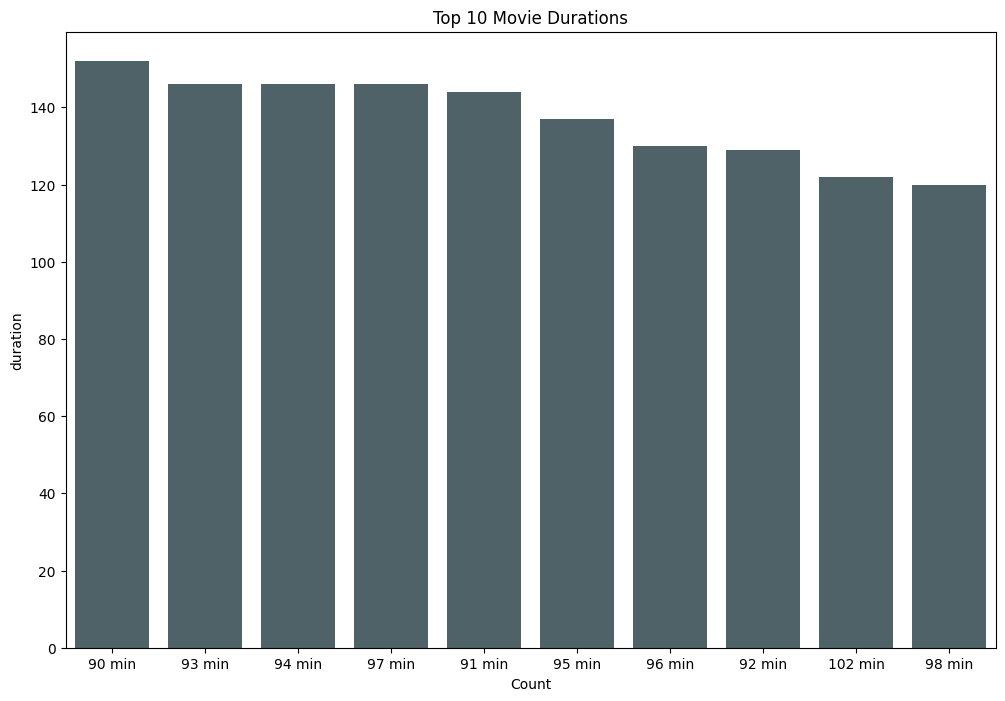

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(x='duration', y='count', data=top_10_movie_durations,dodge=True ,color="#4A646C")
plt.xlabel('Count')
plt.ylabel('duration')
plt.title('Top 10 Movie Durations')
plt.show()

In [62]:
top_10_TV_Show_durations = durations[durations['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_TV_Show_durations

,duration,type,count
0,1 Season,TV Show,1790
110,2 Seasons,TV Show,421
138,3 Seasons,TV Show,198
151,4 Seasons,TV Show,94
162,5 Seasons,TV Show,64
174,6 Seasons,TV Show,33
185,7 Seasons,TV Show,23
196,8 Seasons,TV Show,17
208,9 Seasons,TV Show,9
1,10 Seasons,TV Show,6


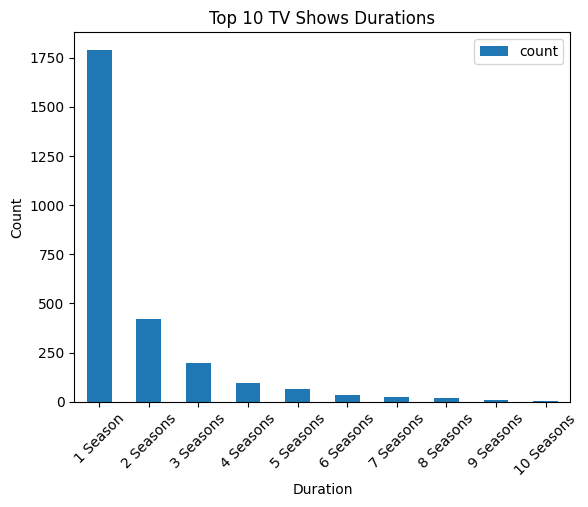

In [63]:
top_10_TV_Show_durations.plot(x='duration', y='count', kind='bar')
plt.title('Top 10 TV Shows Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [64]:
df.groupby(['type'])['category'].value_counts().reset_index()
# second way
#df.groupby(["category",'type'])["category"].value_counts().sort_values(ascending=False)

,type,category,count
0,Movie,"Dramas, International Movies",362
1,Movie,Documentaries,359
2,Movie,Stand-Up Comedy,334
3,Movie,"Comedies, Dramas, International Movies",274
4,Movie,"Dramas, Independent Movies, International Movies",252
...,...,...,...
508,TV Show,"TV Comedies, TV Sci-Fi & Fantasy, Teen TV Shows",1
509,TV Show,"TV Dramas, TV Sci-Fi & Fantasy, TV Thrillers",1
510,TV Show,"TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows",1
511,TV Show,"TV Horror, TV Mysteries, Teen TV Shows",1


In [65]:
category_counts = df.groupby(['type'])['category'].value_counts().reset_index()

top_movies = category_counts[category_counts['type'] == 'Movie'].sort_values(by='count', ascending=False).head(10)
top_tv_shows = category_counts[category_counts['type'] == 'TV Show'].sort_values(by='count', ascending=False).head(10)



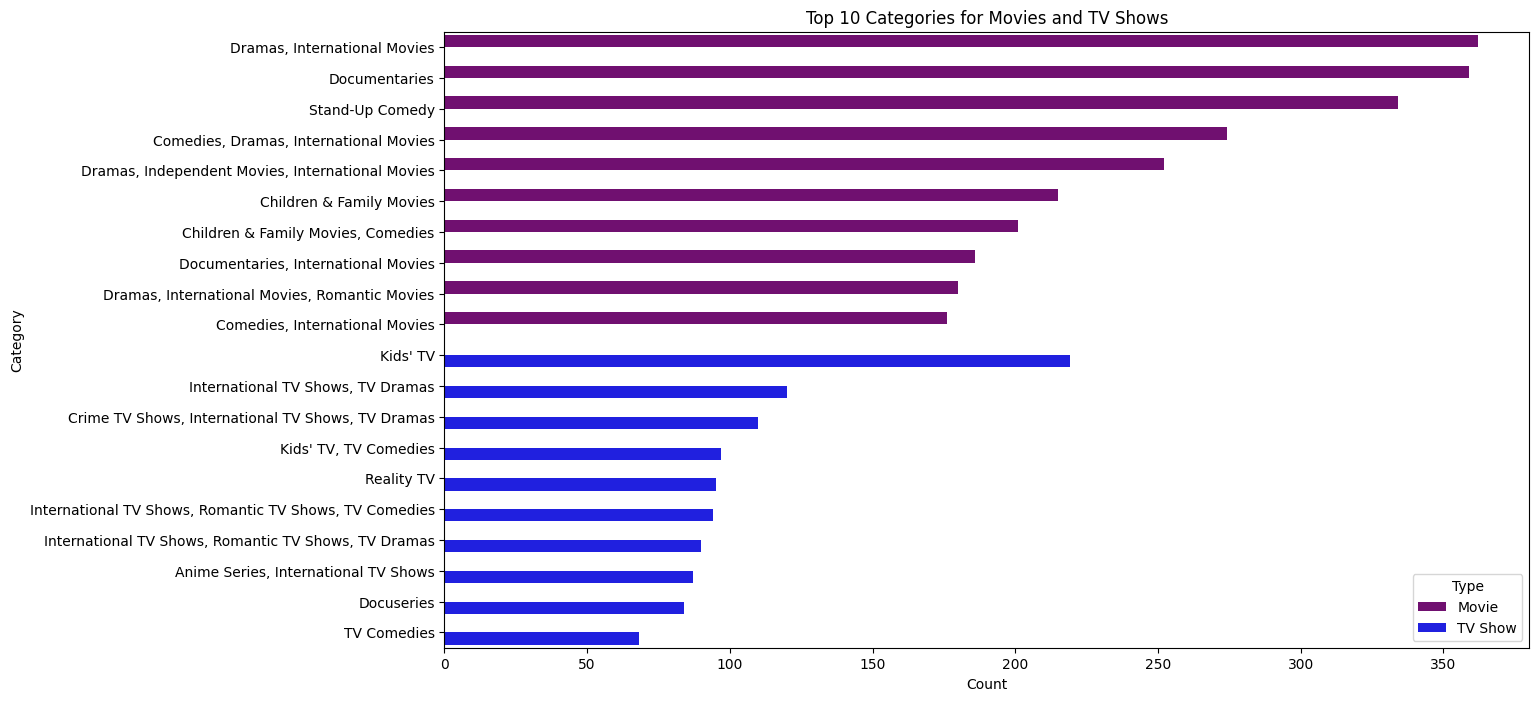

In [66]:
# Combine top movies and TV shows into a single DataFrame
top_combined = pd.concat([top_movies, top_tv_shows])
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='category', hue='type', data=top_combined, palette={'Movie': 'purple', 'TV Show': 'blue'})

plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Top 10 Categories for Movies and TV Shows')
plt.legend(title='Type')
plt.show()

In [67]:
count_year=df.groupby("type").year.value_counts().reset_index()


In [68]:
count_movie_year=count_year[count_year.type=="Movie"]


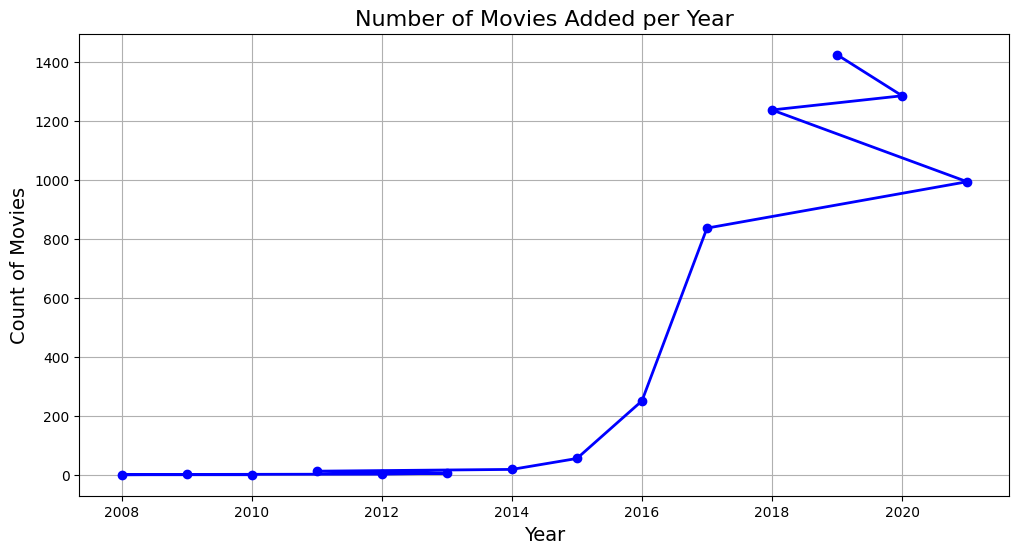

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(count_movie_year['year'], 
         count_movie_year['count'], 
         marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)


plt.title('Number of Movies Added per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Movies', fontsize=14)
plt.grid(True)

plt.show()

In [70]:
count_TVShow_year=count_year[count_year.type=="TV Show"]

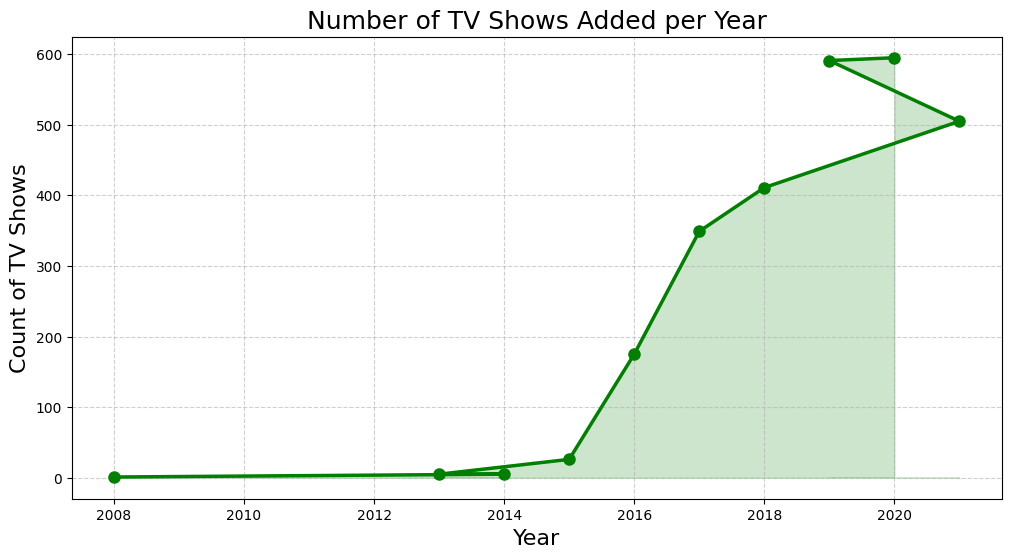

In [71]:
plt.figure(figsize=(12, 6))

# Smooth line plot
plt.plot(count_TVShow_year['year'], 
         count_TVShow_year['count'], 
         marker='o', color='green', linestyle='-', linewidth=2.5, markersize=8)


plt.title('Number of TV Shows Added per Year', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Count of TV Shows', fontsize=16)

# Adding a grid with a slight opacity for better visibility
plt.grid(True, linestyle='--', alpha=0.6)

plt.fill_between(count_TVShow_year['year'], count_TVShow_year['count'], color='green', alpha=0.2)
plt.show()

In [72]:
# 2019
df_2019=df[df["year"]==2019]


In [73]:
theMostCategories_2019=df_2019["category"].value_counts().sort_values( ascending=False).head(5).reset_index()

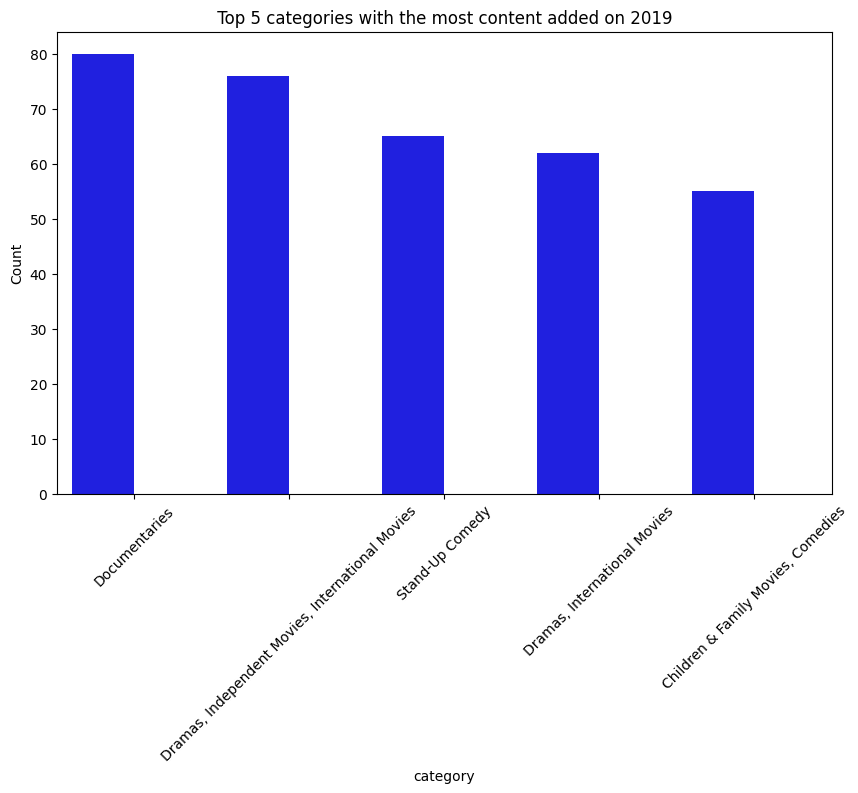

In [74]:
plt.figure(figsize=(10, 6))


sns.barplot(x='category', y='count', data=theMostCategories_2019, color='blue')
for patch in plt.gca().patches:
    patch.set_width(0.4)
plt.title(' Top 5 categories with the most content added on 2019 ')

plt.xlabel('category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()